# Predicción del Gasto Turístico en Bogotá – Contexto y Motivación

Bogotá recibe miles de visitantes cada año, tanto nacionales como internacionales, con perfiles diversos y patrones de gasto heterogéneos. Sin embargo, la ciudad aún enfrenta desafíos para anticipar el impacto económico del turismo y diseñar estrategias segmentadas de promoción, infraestructura y servicios.

Este proyecto busca predecir el gasto turístico individual a partir de variables sociodemográficas, motivacionales y logísticas, utilizando datos abiertos recolectados por la Secretaría Distrital de Desarrollo Económico.

El objetivo es generar un modelo que permita:
- Identificar perfiles de alto gasto.
- Priorizar segmentos turísticos estratégicos.
- Informar decisiones de política pública y promoción.

La relevancia del modelo radica en su capacidad para transformar datos de encuestas en insumos predictivos y visuales que apoyen la toma de decisiones en turismo urbano.

## 1. Carga de datos y diccionario

Se importan las librerías necesarias y se cargan tanto los datos principales como el diccionario de variables. Este paso permite vincular cada columna del dataset con su descripción oficial, facilitando la interpretación y el análisis posterior.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos y diccionario
ruta_datos = "viajeros_2023_datos_abiertos_final.xlsx"
ruta_diccionario = "diccionario-de-datos_viajeros_2023-da.xlsx"

df = pd.read_excel(ruta_datos)
dic = pd.read_excel(ruta_diccionario, header=0).iloc[:, :2]
dic.columns = ["variable", "descripcion"]
dic["variable"] = dic["variable"].astype(str).str.strip()

## 2. Exploración general y metadatos

Antes de realizar cualquier análisis, es fundamental entender la estructura del dataset: cuántas observaciones y variables contiene, qué tipos de datos predominan, y qué porcentaje de valores faltantes hay por variable. Además, se integra el diccionario de datos para facilitar la interpretación de cada columna.

In [59]:
# Dimensiones y primeras filas
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras filas:")
print(df.head(3))

# Resumen de metadatos
meta = pd.DataFrame({
    "variable": df.columns,
    "tipo_dato": df.dtypes.astype(str).values,
    "valores_nulos_%": (df.isnull().sum().values / len(df) * 100).round(2)
}).merge(dic, on="variable", how="left")

print("\nResumen de metadatos (primeras 10 variables):")
print(meta.head(10))

Dimensiones del dataset: (74547, 134)

Primeras filas:
   Obs_ID P_101     P_102    P_102A P_102_B                           P_103  \
0       1    Si  Nacional  CASANARE     NaN  a. Vacaciones/recreación/Ocio    
1       2    No       NaN       NaN     NaN                             NaN   
2       3    No       NaN       NaN     NaN                             NaN   

  P_103A      P_104     P_105     P_105A  ...  P_501_J  P_501_K P_502_A  \
0    NaN  a. Hombre  a. Pesos  3000000.0  ...      NaN      NaN     NaN   
1    NaN        NaN       NaN        NaN  ...      NaN      NaN     NaN   
2    NaN        NaN       NaN        NaN  ...      NaN      NaN     NaN   

   P_502_B P_502_C P_502_D  P_502_E P_502_F P_502_G P_502_H  
0      NaN     NaN     NaN      NaN     NaN     NaN     NaN  
1      NaN     NaN     NaN      NaN     NaN     NaN     NaN  
2      NaN     NaN     NaN      NaN     NaN     NaN     NaN  

[3 rows x 134 columns]

Resumen de metadatos (primeras 10 variables):
  variab


**Explicación:** Esta tabla resume todas las variables, su tipo de dato, porcentaje de valores nulos y una descripción según el diccionario. 
Esto facilita entender el propósito de cada columna.


## 3. Vista general del dataset

In [60]:

df.shape, df.head(3)


((74547, 134),
    Obs_ID P_101     P_102    P_102A P_102_B                           P_103  \
 0       1    Si  Nacional  CASANARE     NaN  a. Vacaciones/recreación/Ocio    
 1       2    No       NaN       NaN     NaN                             NaN   
 2       3    No       NaN       NaN     NaN                             NaN   
 
   P_103A      P_104     P_105     P_105A  ...  P_501_J  P_501_K P_502_A  \
 0    NaN  a. Hombre  a. Pesos  3000000.0  ...      NaN      NaN     NaN   
 1    NaN        NaN       NaN        NaN  ...      NaN      NaN     NaN   
 2    NaN        NaN       NaN        NaN  ...      NaN      NaN     NaN   
 
    P_502_B P_502_C P_502_D  P_502_E P_502_F P_502_G P_502_H  
 0      NaN     NaN     NaN      NaN     NaN     NaN     NaN  
 1      NaN     NaN     NaN      NaN     NaN     NaN     NaN  
 2      NaN     NaN     NaN      NaN     NaN     NaN     NaN  
 
 [3 rows x 134 columns])


**Explicación:** Se muestra el tamaño del dataset y las primeras filas para verificar su estructura.


## 4. Visualización de valores faltantes

Para evaluar la calidad del dataset, se analiza el porcentaje de valores nulos por variable. Esta visualización permite identificar columnas que requieren limpieza, imputación o exclusión del análisis. Se grafican las 20 variables con mayor proporción de datos faltantes.

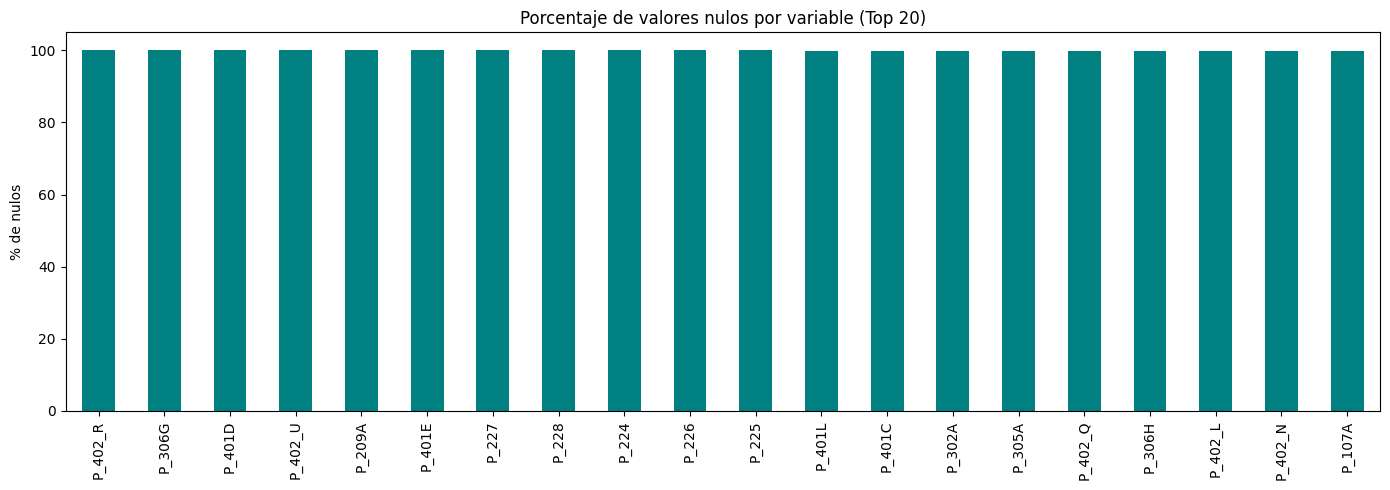

In [61]:
faltantes = df.isnull().mean().sort_values(ascending=False) * 100
plt.figure(figsize=(14, 5))
faltantes.head(20).plot(kind='bar', color='teal')
plt.title("Porcentaje de valores nulos por variable (Top 20)")
plt.ylabel("% de nulos")
plt.tight_layout()
plt.show()


**Explicación:** Visualiza las variables con más valores faltantes. Esto ayuda a identificar posibles problemas de calidad de datos.


## 5. Estadísticas descriptivas y categóricas

Se analizan las variables numéricas para entender la distribución del gasto, duración del viaje y otras métricas relevantes.

In [62]:
# Estadísticas descriptivas de variables numéricas
num_cols = df.select_dtypes(include=[np.number]).columns
print("Resumen estadístico de variables numéricas:")
print(df[num_cols].describe().T)

Resumen estadístico de variables numéricas:
           count          mean           std      min        25%  \
Obs_ID   74547.0  3.727400e+04  2.152001e+04      1.0   18637.50   
P_105A    5507.0  1.323706e+06  3.274459e+06      0.0  300000.00   
P_105B     779.0  2.496182e+03  4.013631e+03     50.0     600.00   
P_105C     175.0  2.380629e+03  2.780993e+03      5.0    1000.00   
P_106A   18934.0  1.668380e+01  9.388779e+01      0.0       3.00   
P108     19450.0  2.112751e+00  2.235157e+00      0.0       1.00   
P_205    46553.0  2.091251e+00  8.192903e+00      1.0       1.00   
P_207     8853.0  4.139761e+01  1.386261e+01      0.0      31.00   
P_213      872.0  4.194037e+01  1.630729e+01      3.0      30.00   
P_219      166.0  3.056024e+01  1.639750e+01      4.0      19.00   
P_225       26.0  3.215385e+01  2.869940e+01      6.0      13.25   
P_302A      33.0  3.393939e+00  3.399811e+00      1.0       2.00   
P_302B     422.0  3.270142e+00  3.627293e+00      1.0       1.00   
P_30


**Explicación:** Se presentan estadísticas descriptivas (promedio, desviación estándar, etc.) para las variables numéricas.


## 6. Variables categóricas destacadas

Se revisan las variables categóricas más representativas para identificar patrones en el tipo de visitante, motivo del viaje y lugar de origen. Esta exploración permite seleccionar variables clave para el modelo y el dashboard.

In [63]:
# Frecuencia de variables categóricas destacadas
cat_cols = df.select_dtypes(include='object').columns[:5]
for col in cat_cols:
    desc = dic.loc[dic['variable'] == col, 'descripcion'].values
    descripcion = desc[0] if len(desc) > 0 else col
    print(f"\n{col} – {descripcion}")
    print(df[col].value_counts(normalize=True).head(5))



P_101 – ¿Vive usted en Bogotá?
P_101
No    0.724094
Si    0.275906
Name: proportion, dtype: float64

P_102 – ¿Cuál es su lugar de visita?
P_102
Nacional         0.793506
Internacional    0.206494
Name: proportion, dtype: float64

P_102A – Departamento
P_102A
BOYACÁ          0.151764
CUNDINAMARCA    0.121387
Ns/Nr           0.074870
TOLIMA          0.072660
ANTIOQUIA       0.063823
Name: proportion, dtype: float64

P_102_B – Pais
P_102_B
Estados Unidos    0.210214
España            0.179335
Ecuador           0.100950
Perú              0.086461
Panamá            0.077197
Name: proportion, dtype: float64

P_103 – ¿Cuál es la principal razón o motivo de su viaje?
P_103
b. Visita a familiares y amigos         0.415210
a. Vacaciones/recreación/Ocio           0.330246
h. Trabajo remunerado en otra ciudad    0.155038
g. Negocios y motivos profesionales     0.059565
c. Educación y formación                0.014692
Name: proportion, dtype: float64


## 7. Visualización de variables clave

Se grafican las distribuciones de variables categóricas relevantes como lugar de visita, país de origen y motivo del viaje. Estas visualizaciones permiten identificar patrones de comportamiento y preferencias que serán útiles para el diseño del dashboard y la segmentación de perfiles.

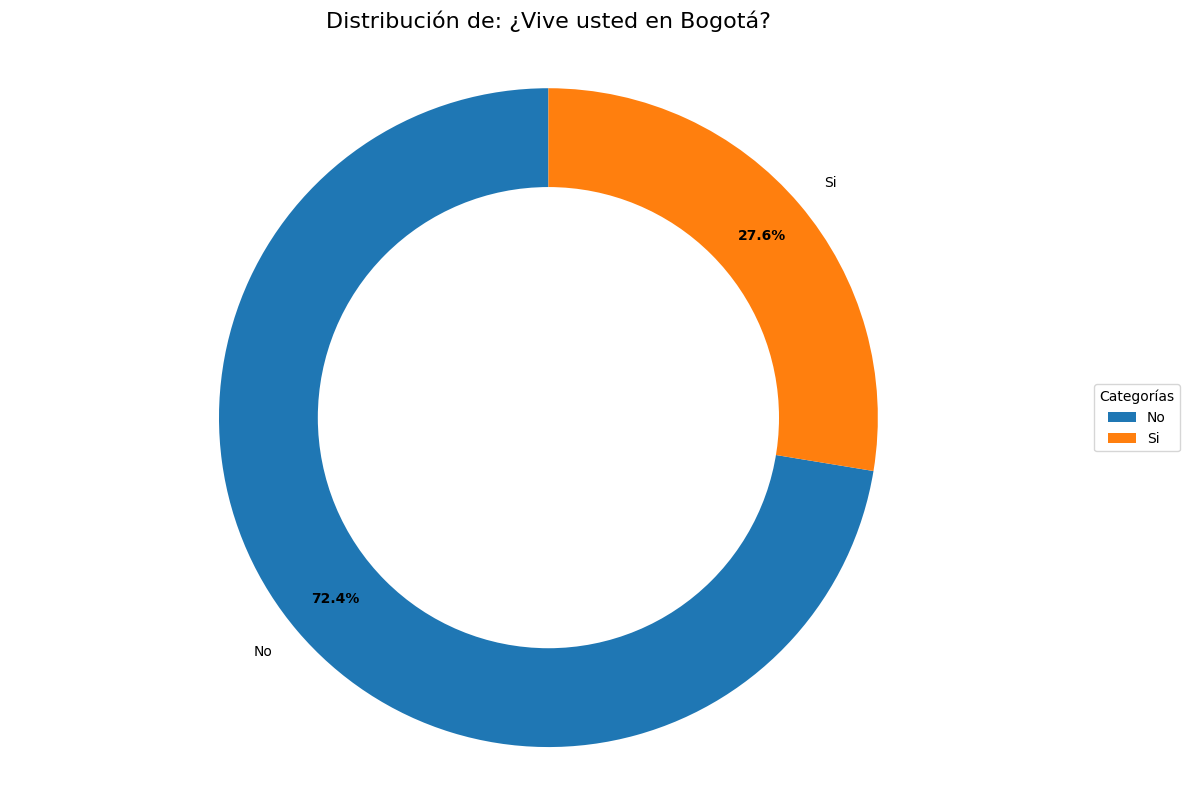

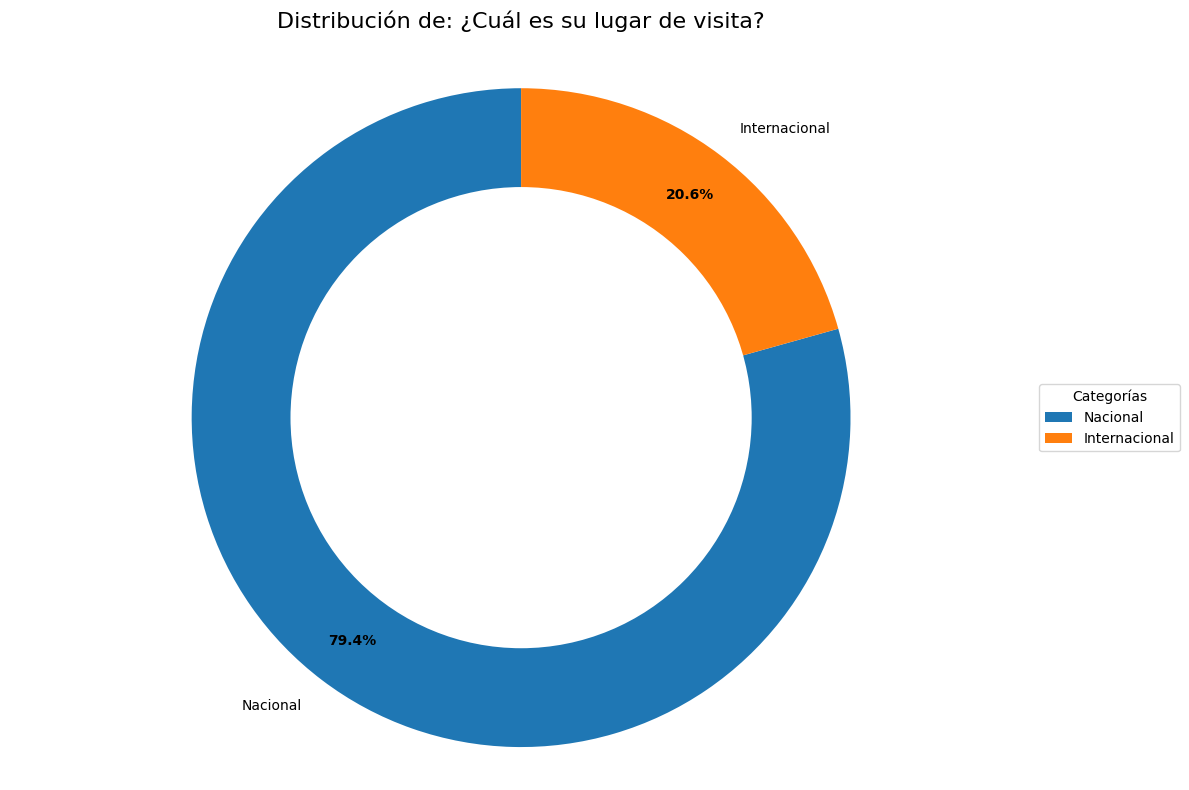

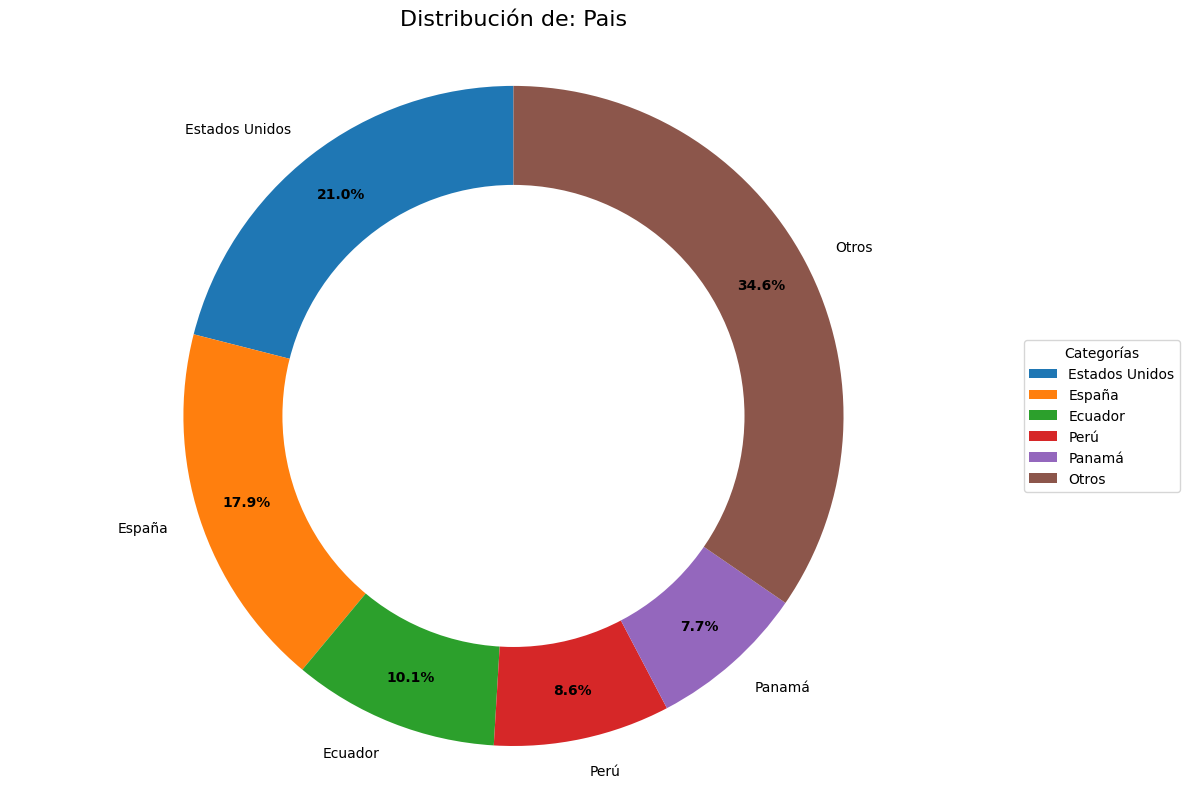

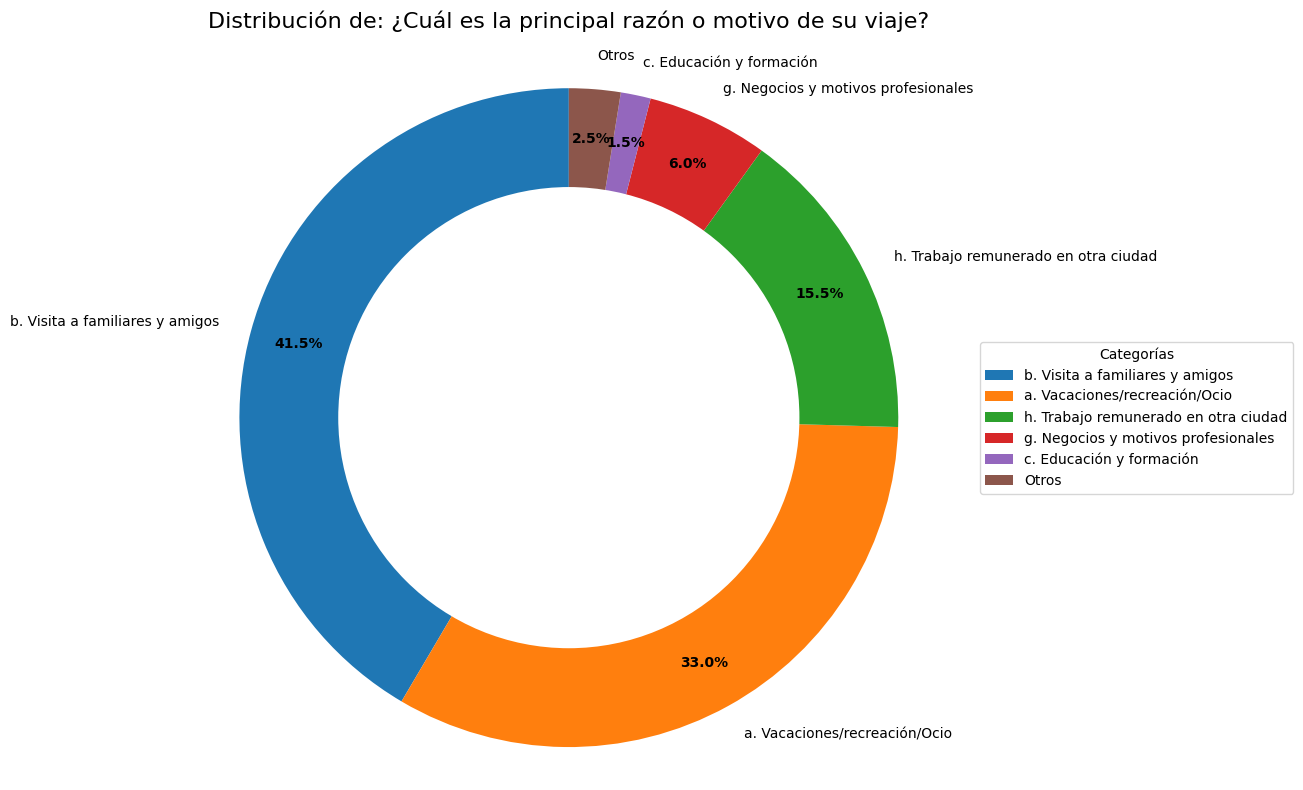

In [64]:
cols_para_pie = ['P_101', 'P_102', 'P_102_B', 'P_103']

for col in cols_para_pie:
    try:
        desc = dic.loc[dic['variable'] == col, 'descripcion'].values
        titulo = desc[0] if len(desc) > 0 else col
    except Exception:
        titulo = col

    counts_normalizadas = df[col].value_counts(normalize=True, dropna=True)

    if len(counts_normalizadas) > 5:
        top_5 = counts_normalizadas.head(5)
        otros_sum = counts_normalizadas.iloc[5:].sum()
        data_para_plot = pd.concat([top_5, pd.Series({'Otros': otros_sum})])
    else:
        data_para_plot = counts_normalizadas

    plt.figure(figsize=(12, 8))
    wedges, texts, autotexts = plt.pie(
        data_para_plot,
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.85,
        labels=data_para_plot.index,
        textprops={'color':"w"}
    )
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_weight('bold')
    for text in texts:
        text.set_color('black')

    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.title(f'Distribución de: {titulo}', fontsize=16, pad=20)
    plt.axis('equal')
    plt.legend(data_para_plot.index, title="Categorías", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.tight_layout()
    plt.show()

## 8. Correlación entre variables numéricas

Se presenta un mapa de calor con nombres descriptivos, útil para identificar redundancias y asociaciones relevantes entre variables numéricas. Esta visualización permite detectar relaciones que pueden ser útiles para el modelado y para entender el comportamiento de los visitantes.

C:\Users\camil\AppData\Local\Temp\ipykernel_36012\3805855465.py:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


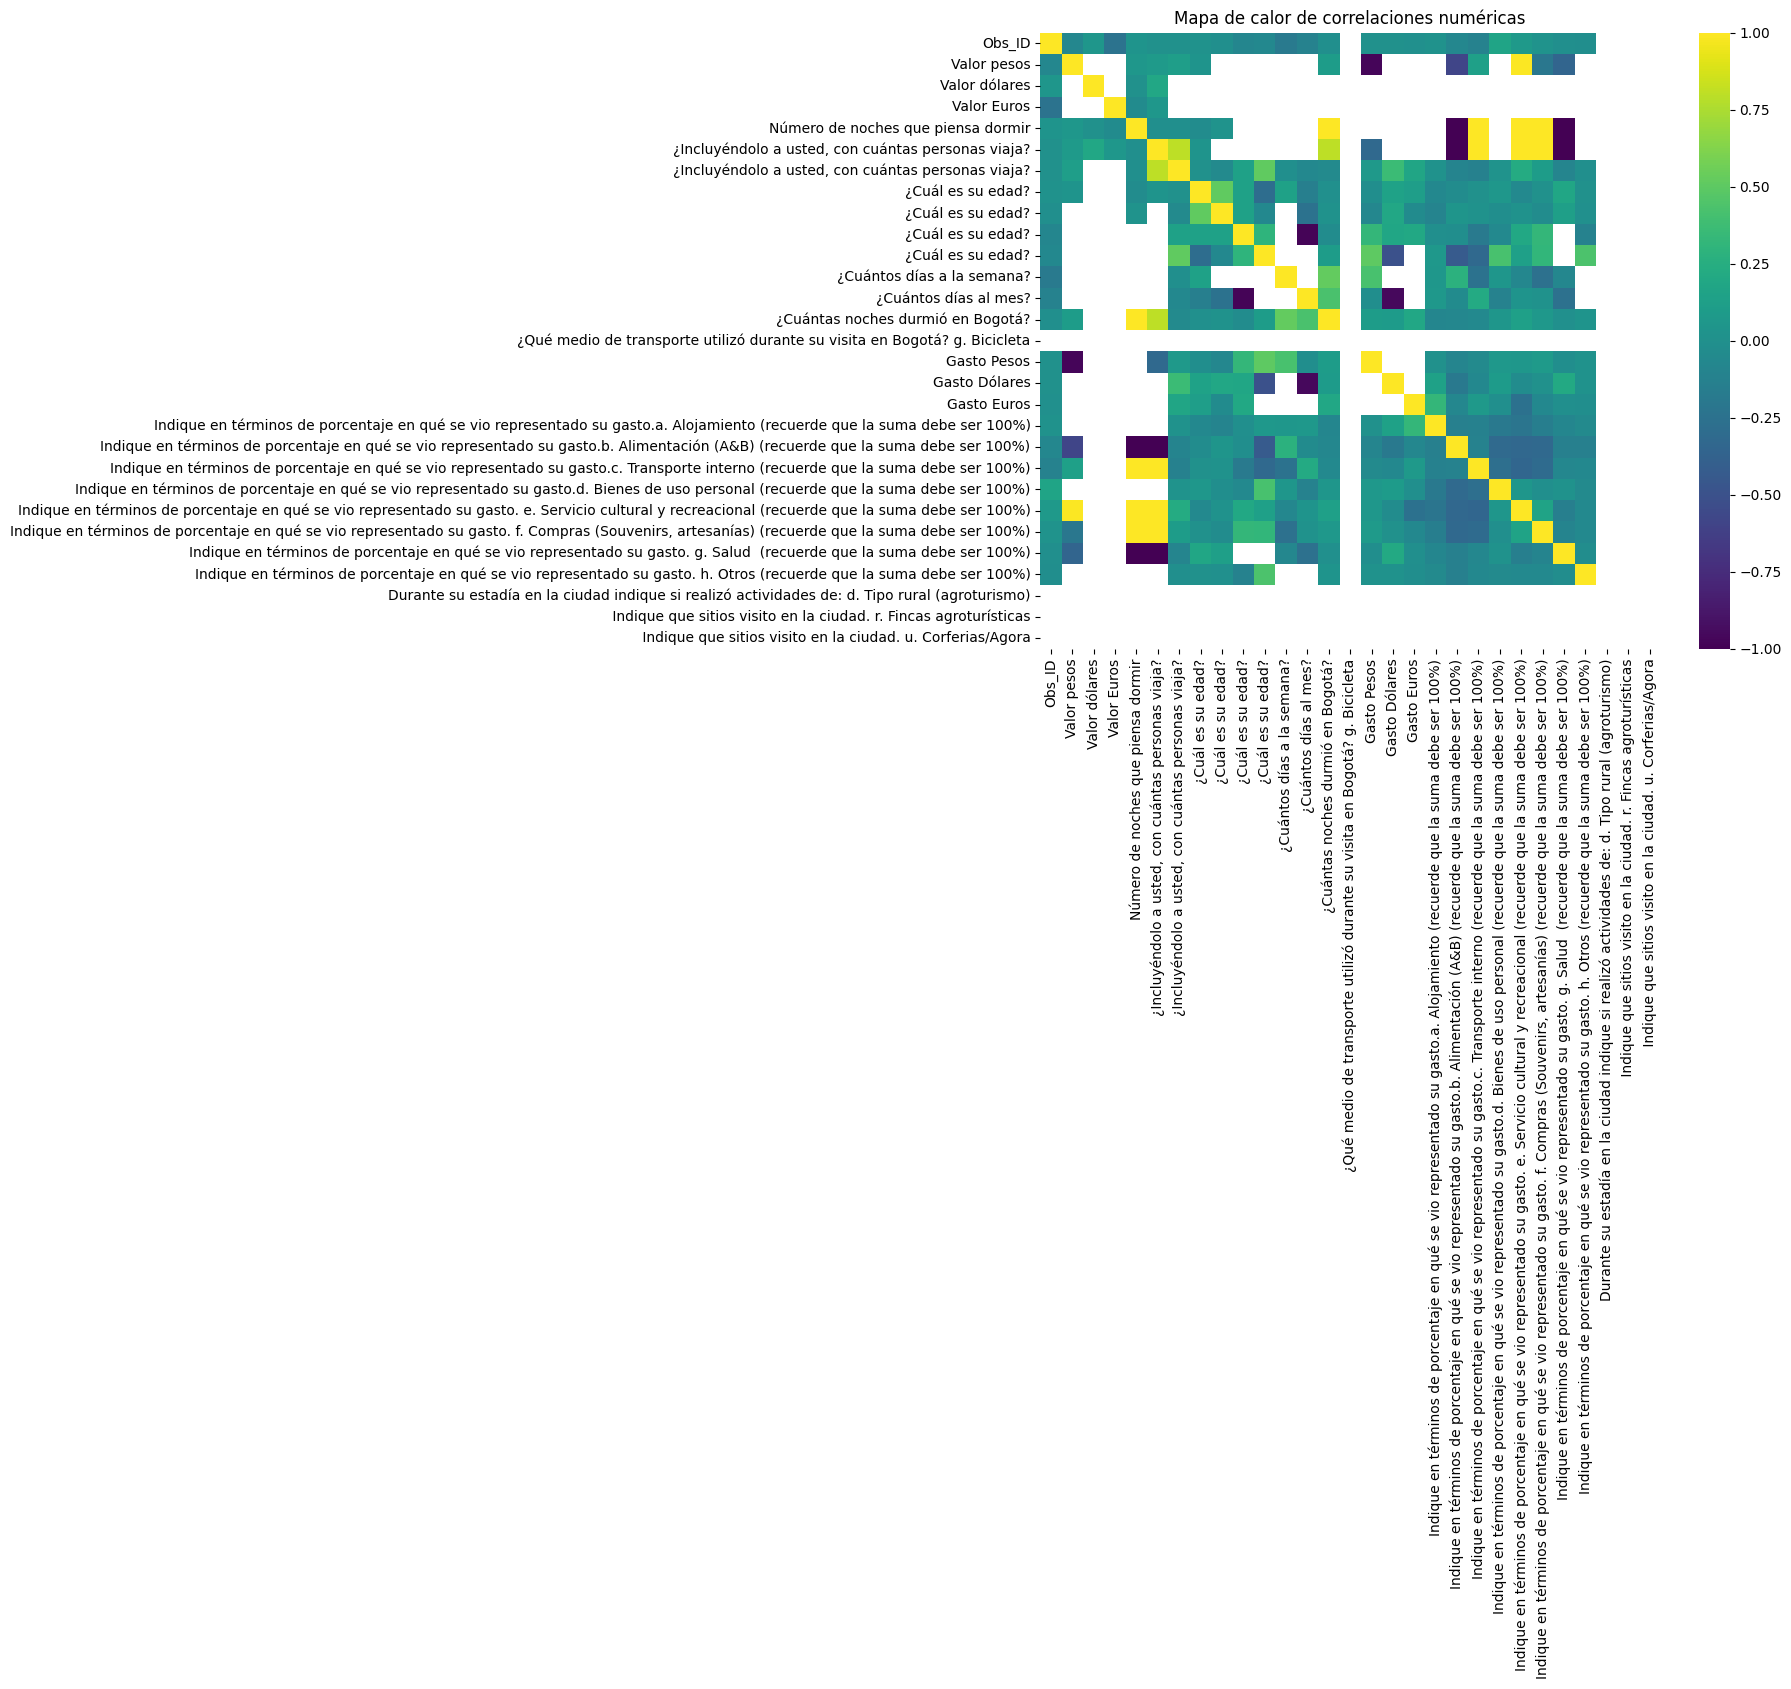

In [65]:
mapa_nombres = dic.set_index('variable')['descripcion'].to_dict()
matriz_corr = df[num_cols].corr()
matriz_corr_desc = matriz_corr.rename(index=mapa_nombres, columns=mapa_nombres)

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr_desc, cmap='viridis', center=0)
plt.title("Mapa de calor de correlaciones numéricas")
plt.tight_layout()
plt.show()


**Explicación:** Se observa la relación lineal entre variables numéricas. Una alta correlación puede indicar redundancia o asociaciones relevantes.


## 9. Creación de variables derivadas

Se generan variables clave para el análisis y el modelado:
- `gasto_total_pesos`: gasto total en pesos (P_307A).
- `duracion_estadia`: número de noches en Bogotá (P_304).
- `gasto_promedio_diario`: gasto total dividido por duración.
- `tipo_turista`: clasificación del visitante como nacional o extranjero según P_102.

Estas variables permiten construir visualizaciones temáticas y alimentar el modelo predictivo.

In [66]:
df["gasto_total_pesos"] = df["P_307A"]
df["duracion_estadia"] = df["P_304"]
df["gasto_promedio_diario"] = df["gasto_total_pesos"] / df["duracion_estadia"]
df["tipo_turista"] = df["P_102"].map({"Nacional": "Nacional", "Internacional": "Extranjero"})

print("Variables derivadas creadas:")
print("- gasto_total_pesos ← P_307A")
print("- duracion_estadia ← P_304")
print("- gasto_promedio_diario = gasto_total_pesos / duracion_estadia")
print("- tipo_turista ← P_102 (Nacional vs Extranjero)")

Variables derivadas creadas:
- gasto_total_pesos ← P_307A
- duracion_estadia ← P_304
- gasto_promedio_diario = gasto_total_pesos / duracion_estadia
- tipo_turista ← P_102 (Nacional vs Extranjero)


## 10. Gasto por perfil de visitante

Se analiza el gasto promedio según tres variables clave:
- Tipo de alojamiento (`P_107`)
- Motivo del viaje (`P_103`)
- Tipo de turista (`tipo_turista`)

Estos resultados permiten identificar segmentos con mayor impacto económico y orientar estrategias de promoción turística. También sirven como insumo directo para el diseño del dashboard.

In [67]:
print("Gasto promedio por tipo de alojamiento (P_107):")
print(df.groupby("P_107")["gasto_total_pesos"].mean().round(2).sort_values(ascending=False))

print("\nGasto promedio por motivo de viaje (P_103):")
print(df.groupby("P_103")["gasto_total_pesos"].mean().round(2).sort_values(ascending=False))

print("\nGasto promedio por tipo de turista:")
print(df.groupby("tipo_turista")["gasto_total_pesos"].mean().round(2))

Gasto promedio por tipo de alojamiento (P_107):
P_107
b. Hostal                                             1800000.00
e. Casa propia, de familiares o amigos (sin pago)      777312.05
a. Hotel                                                     NaN
c. Apartahotel                                               NaN
d. Inmueble de alquiler (pagos por plataforma dig)           NaN
f. Otro                                                      NaN
Name: gasto_total_pesos, dtype: float64

Gasto promedio por motivo de viaje (P_103):
P_103
b. Visita a familiares y amigos           1038656.03
f. Compras                                 800000.00
a. Vacaciones/recreación/Ocio              466666.67
c. Educación y formación                         NaN
d. Salud , Bienestar y atención médica           NaN
e. Religión/Peregrinaciones                      NaN
g. Negocios y motivos profesionales              NaN
h. Trabajo remunerado en otra ciudad             NaN
i. Otro.                                 

## 11. Variables disponibles para visualización

Se identifican las variables que serán utilizadas en el dashboard interactivo. Estas variables permiten segmentar perfiles de visitantes y explorar patrones de gasto. Se incluye la descripción oficial de cada variable según el diccionario.

In [68]:
variables_visuales = [
    "tipo_turista",
    "P_107",  # Tipo de alojamiento
    "P_103",  # Motivo del viaje
    "P_306E", # Transporte público
    "gasto_total_pesos",
    "gasto_promedio_diario"
]

print("Variables disponibles para visualización:")
for var in variables_visuales:
    desc = dic.loc[dic["variable"] == var, "descripcion"].values
    descripcion = desc[0] if len(desc) > 0 else "Sin descripción"
    print(f"- {var}: {descripcion}")

Variables disponibles para visualización:
- tipo_turista: Sin descripción
- P_107: ¿Dónde piensa alojarse la mayor parte del tiempo?
- P_103: ¿Cuál es la principal razón o motivo de su viaje?
- P_306E: ¿Qué medio de transporte utilizó durante su visita en Bogotá? e. Transporte público
- gasto_total_pesos: Sin descripción
- gasto_promedio_diario: Sin descripción


## 12. Preparación para modelado predictivo

Se seleccionan variables relevantes para explicar el gasto turístico:
- `duracion_estadia`: número de noches en Bogotá.
- `P_107`: tipo de alojamiento.
- `P_103`: motivo del viaje.
- `P_306E`: uso de transporte público.

Se codifican las variables categóricas mediante one-hot encoding y se divide el dataset en conjuntos de entrenamiento y prueba. Este paso deja los datos listos para ajustar un modelo de regresión o árbol de decisión.

In [69]:
from sklearn.model_selection import train_test_split

features = ["duracion_estadia", "P_107", "P_103", "P_306E"]
target = "gasto_total_pesos"

df_model = pd.get_dummies(df[features + [target]], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    df_model.drop(columns=target),
    df_model[target],
    test_size=0.2,
    random_state=42
)

print("Preparación para modelado:")
print(f"- Variables seleccionadas: {features}")
print(f"- Tamaño de entrenamiento: {X_train.shape}")
print(f"- Tamaño de prueba: {X_test.shape}")

Preparación para modelado:
- Variables seleccionadas: ['duracion_estadia', 'P_107', 'P_103', 'P_306E']
- Tamaño de entrenamiento: (59637, 14)
- Tamaño de prueba: (14910, 14)


## 13. Conclusiones generales



- Se identificaron **134 variables**, con predominancia de tipo **categórico**.
- Se integró el **diccionario de datos**, lo que permite entender el contexto de cada variable.
- Existen variables con más del 50% de valores faltantes, lo cual requiere limpieza o imputación.
- Las estadísticas descriptivas y correlaciones servirán como base para modelado o análisis posteriores.

Este proyecto abordó el problema de la falta de herramientas predictivas para anticipar el impacto económico del turismo en Bogotá. A partir de datos abiertos recolectados por la Secretaría Distrital de Desarrollo Económico, se construyó un flujo de análisis reproducible que permite estimar el gasto turístico individual según variables clave como motivo del viaje, tipo de alojamiento y duración de la estadía.

La pregunta de negocio se centró en identificar qué factores explican mejor el gasto turístico y cómo pueden utilizarse para segmentar perfiles de visitantes. El alcance incluyó la exploración del dataset, la creación de variables derivadas, la preparación para modelado supervisado y el diseño conceptual de un dashboard interactivo.

Durante la exploración se identificaron patrones relevantes:
- Los visitantes nacionales representan el 79% de la muestra.
- El motivo más frecuente es la visita a familiares y amigos.
- El gasto promedio varía significativamente según el tipo de alojamiento y el motivo del viaje.

Se derivaron variables como `gasto_total_pesos`, `gasto_promedio_diario` y `tipo_turista`, que permiten construir visualizaciones temáticas y alimentar modelos de regresión. Además, se seleccionaron variables predictoras y se dividió el dataset en entrenamiento y prueba, dejando listo el insumo para modelado.

La maqueta del dashboard incluirá:
- Indicadores de gasto por perfil de visitante.
- Filtros interactivos por motivo de viaje, tipo de alojamiento y transporte.
- Visualizaciones que faciliten la toma de decisiones estratégicas en promoción turística.

Este análisis demuestra cómo los datos abiertos pueden convertirse en herramientas de planificación inteligente, y sienta las bases para un prototipo funcional que responda a necesidades reales del sector público y privado.
